## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet152
from keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = './data/train'
val =   './data/val'
test =  './data/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [3]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [5]:
model = Sequential([
                    Conv2D(16, 3, activation='relu', input_shape=(150, 150, 3)),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(32, 3, activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(64, 3, activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Flatten(),
                    Dense(10, activation='relu'),
                    Dropout(.5),
                    Dense(1, activation='sigmoid')
])

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
# add some callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
]

In [10]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=30, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    verbose=1,
    callbacks=callbacks
    )

Epoch 1/30
312/312 [==============================] - ETA: 0s - loss: 0.6732 - accuracy: 0.5504
Epoch 1: val_loss improved from inf to 0.61126, saving model to model.h5
312/312 [==============================] - 185s 564ms/step - loss: 0.6732 - accuracy: 0.5504 - val_loss: 0.6113 - val_accuracy: 0.6834
Epoch 2/30
312/312 [==============================] - ETA: 0s - loss: 0.5982 - accuracy: 0.6523
Epoch 2: val_loss improved from 0.61126 to 0.53371, saving model to model.h5
312/312 [==============================] - 117s 375ms/step - loss: 0.5982 - accuracy: 0.6523 - val_loss: 0.5337 - val_accuracy: 0.7323
Epoch 3/30
312/312 [==============================] - ETA: 0s - loss: 0.5432 - accuracy: 0.7189
Epoch 3: val_loss improved from 0.53371 to 0.49929, saving model to model.h5
312/312 [==============================] - 118s 376ms/step - loss: 0.5432 - accuracy: 0.7189 - val_loss: 0.4993 - val_accuracy: 0.7767
Epoch 4/30
312/312 [==============================] - ETA: 0s - loss: 0.5090 - a

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

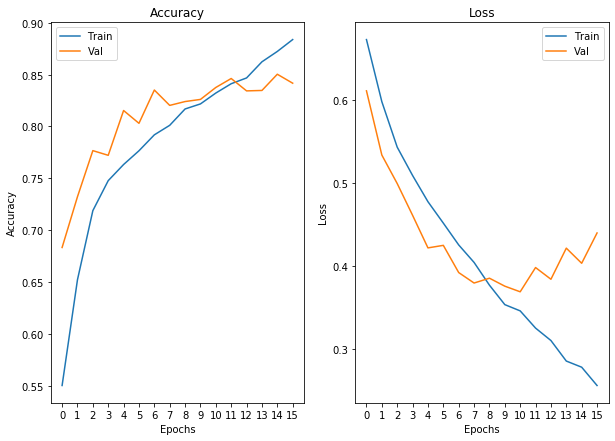

In [13]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(map(str, (range(0,callbacks[0].stopped_epoch+1))))

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(epochs, train_acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, train_loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')

plt.show()

As we can see, training stopped by EarlyStopping callback at 16th iteration because the loss didn't improved since previous 5 iterations. And note that we also implement ModelCheckpoint callback which only save the best model, so in the next step we will load our best model and use it for predict on test data and inference as well.

In [16]:
# load best model
scratch_model = tf.keras.models.load_model('model.h5')

# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

# scores = model.evaluate(test_generator, batch_size=nb_test_samples // batch_size)
loss, acc = scratch_model.evaluate(test_generator, verbose=1)
print("Accuracy on test data: %.2f%%" % (acc*100))

40/40 [==============================] - 12s 294ms/step - loss: 0.3588 - accuracy: 0.8300
Accuracy on test data: 83.00%


Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [17]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [18]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)
# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
# + ReLu
model.add(Dense(256, activation='relu'))
# + Dropout
model.add(Dropout(.5))
# + Dense layer with 1 neuron
# + sigmoid
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

In [21]:
# add some callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1),
    ModelCheckpoint('vgg16.h5', verbose=1, save_best_only=True)
]

In [22]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks)

Epoch 1/15
312/312 [==============================] - ETA: 0s - loss: 0.4895 - accuracy: 0.7576
Epoch 1: val_loss improved from inf to 0.35253, saving model to vgg16.h5
312/312 [==============================] - 394s 1s/step - loss: 0.4895 - accuracy: 0.7576 - val_loss: 0.3525 - val_accuracy: 0.8664
Epoch 2/15
312/312 [==============================] - ETA: 0s - loss: 0.3392 - accuracy: 0.8535
Epoch 2: val_loss improved from 0.35253 to 0.29902, saving model to vgg16.h5
312/312 [==============================] - 444s 1s/step - loss: 0.3392 - accuracy: 0.8535 - val_loss: 0.2990 - val_accuracy: 0.8836
Epoch 3/15
312/312 [==============================] - ETA: 0s - loss: 0.3000 - accuracy: 0.8712
Epoch 3: val_loss improved from 0.29902 to 0.27307, saving model to vgg16.h5
312/312 [==============================] - 440s 1s/step - loss: 0.3000 - accuracy: 0.8712 - val_loss: 0.2731 - val_accuracy: 0.8873
Epoch 4/15
312/312 [==============================] - ETA: 0s - loss: 0.2741 - accuracy: 

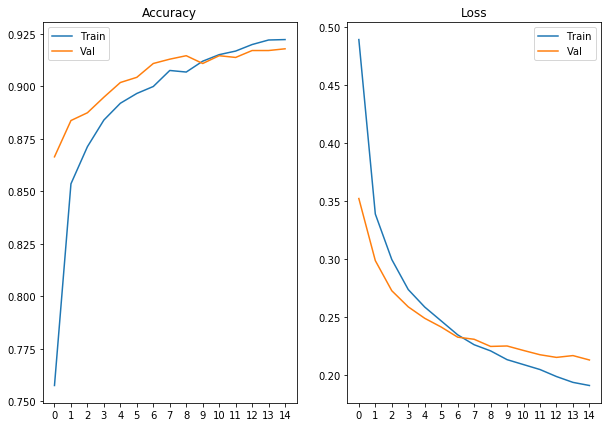

In [30]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(map(str, range(0, 15)))

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(epochs, train_acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, train_loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.legend()
plt.title('Loss')

plt.show()

In [31]:
# load VGG16 best model
vgg16 = tf.keras.models.load_model('vgg16.h5')

scores = vgg16.evaluate(test_generator)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

40/40 [==============================] - 39s 973ms/step - loss: 0.2199 - accuracy: 0.9024
Accuracy on test data: 90.24%


By using transfer learning from VGG16 pretrained model, the accuracy has improved by 0.07 or 7%.

### Xception

In [38]:
# download pretrained model
xception = Xception(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

xception.trainable = False

xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_4[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

#### Add FC layer

In [40]:
model = Sequential([
    xception,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 33,969,193
Trainable params: 13,107,713
Non-trainable params: 20,861,480
_________________________________________________________________


In [41]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [42]:
# add some callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1),
    ModelCheckpoint('xception.h5', verbose=1, save_best_only=True)
]

In [44]:
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks
)

Epoch 1/15
312/312 [==============================] - ETA: 0s - loss: 0.1062 - accuracy: 0.9582
Epoch 1: val_loss improved from inf to 0.09209, saving model to xception.h5
312/312 [==============================] - 357s 1s/step - loss: 0.1062 - accuracy: 0.9582 - val_loss: 0.0921 - val_accuracy: 0.9626
Epoch 2/15
312/312 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9725
Epoch 2: val_loss improved from 0.09209 to 0.08495, saving model to xception.h5
312/312 [==============================] - 422s 1s/step - loss: 0.0730 - accuracy: 0.9725 - val_loss: 0.0850 - val_accuracy: 0.9630
Epoch 3/15
312/312 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9781
Epoch 3: val_loss did not improve from 0.08495
312/312 [==============================] - 427s 1s/step - loss: 0.0588 - accuracy: 0.9781 - val_loss: 0.0858 - val_accuracy: 0.9655
Epoch 4/15
312/312 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 0.9815
Epoch 4: val_loss

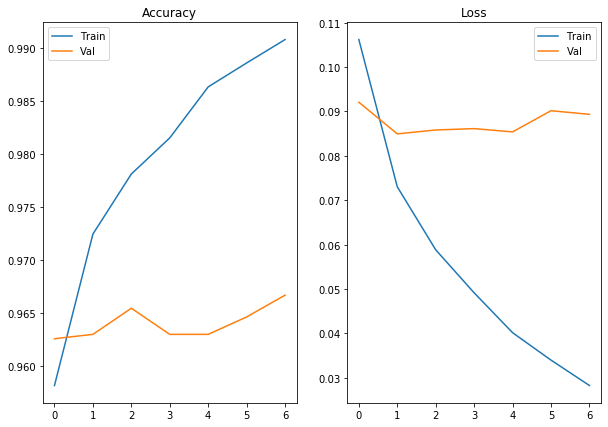

In [47]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(map(str, range(0, callbacks[0].stopped_epoch+1)))

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.plot(epochs, train_acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs, train_loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.legend()
plt.title('Loss')

plt.show()

In [49]:
# load VGG16 best model
xcept = tf.keras.models.load_model('xception.h5')

xcept = model.evaluate(test_generator)
print("Accuracy on test data: %.2f%%" % (xcept[1]*100))

40/40 [==============================] - 34s 842ms/step - loss: 0.1037 - accuracy: 0.9588
Accuracy on test data: 95.88%


Here we can see by using Xception pretrained model, we improved test accuracy by 0.05 or 5% from VGG16. But it seems that we had overfitting since our train and validation loss difference is quite big. Also, we stopped at 7th epoch since the loss didn't improved.

## Model Inference
Now we will try to make a inference on out-of-sample data. We will download a picture randomly from google.
<br><br>
But first, let's see what is class that assigned to cat and dog.

In [94]:
gen = test_generator
tgn = gen.next()
data, label = tgn[0][:3], tgn[1][:3]

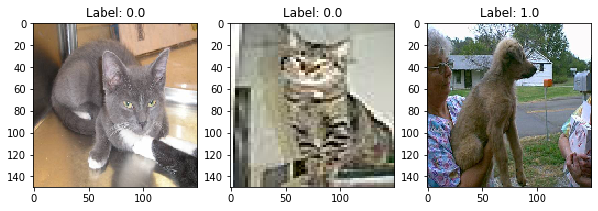

In [95]:
# preview
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(data[0])
plt.title(f'Label: {label[0]}')
plt.subplot(1,3,2)
plt.imshow(data[1])
plt.title(f'Label: {label[1]}')
plt.subplot(1,3,3)
plt.imshow(data[2])
plt.title(f'Label: {label[2]}')
plt.show()

Now we understand that cat has label 0, while dog is 1.

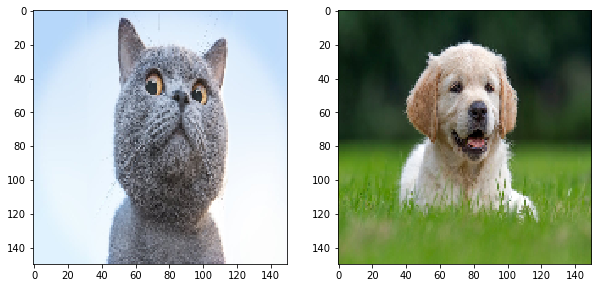

In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np

# load cat and dog images
cat = image.load_img('./cat.jpg', target_size=(150, 150))
dog = image.load_img('./dog.jpg', target_size=(150, 150))

# preview
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cat)
plt.subplot(1,2,2)
plt.imshow(dog)
plt.show()

In [3]:
# transform img to array
x_cat = image.img_to_array(cat)
x_dog = image.img_to_array(dog)

x_cat = np.expand_dims(x_cat, axis=0)
x_dog = np.expand_dims(x_dog, axis=0)
cat_feature = np.vstack([x_cat])
dog_feature = np.vstack([x_dog])

In [4]:
# load all saved models
scratch_model = tf.keras.models.load_model('model.h5')
vgg16 = tf.keras.models.load_model('vgg16.h5')
xcept = tf.keras.models.load_model('xception.h5')

models = {
    'scratch': scratch_model,
    'vgg16': vgg16,
    'xception': xcept
}

In [5]:
# make a prediction!
for name, m in models.items():
    cat_pred = m.predict(cat_feature, batch_size=1)
    cat_label = 'cat' if cat_pred < 0.5 else 'dog'
    print(f'{name} predicted cat as: {cat_label}')

    dog_pred = m.predict(dog_feature, batch_size=1)
    dog_label = 'cat' if dog_pred < 0.5 else 'dog'
    print(f'{name} predicted dog as: {dog_label}')

scratch predicted cat as: cat
scratch predicted dog as: dog
vgg16 predicted cat as: cat
vgg16 predicted dog as: dog
xception predicted cat as: dog
xception predicted dog as: dog


We see that our scratch and vgg16 transfered learning is better on predicting than xception even their accuracies on test data is lower than xception. By this result we see that overfit model is not good for production, and we may better using a bit lower accuracy but not overfit.